In [5]:
#Imports
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

#Read in the data
df = pd.read_csv("df_kansasdata_1_copy_1.csv")

## Exploratory Analysis 

First we look at the correlation matrix to determine which factors have a correlation and if any of them are strong.

In [185]:
#Create correlation matrix
print(df.corr(numeric_only = True))

                                              Year  Price_Kansas_monthly  \
Year                                      1.000000              0.339390   
Price_Kansas_monthly                      0.339390              1.000000   
Price_usa_monthly                         0.418645              0.979579   
Price_corn_monthly                        0.483858              0.875536   
Date                                      0.999986              0.339259   
Rainfall_Kansas                          -0.021739             -0.092489   
Avg_Tem_k                                -0.011847             -0.036347   
Year_sale                                 1.000000              0.357671   
Sales_Kansas_monthly                     -0.019419             -0.093379   
Import_usa_monthly                        0.373187              0.576874   
Export_usa_monthly                        0.097253              0.654629   
Avg_Production                           -0.314935             -0.335711   
Annual_Produ

We noticed that the Sales_Kansas_monthly was correlated with Avg_Tem_k and Rainfall_Kansas

With this observation we proceed to graph these features together to see what the correlation looks like.

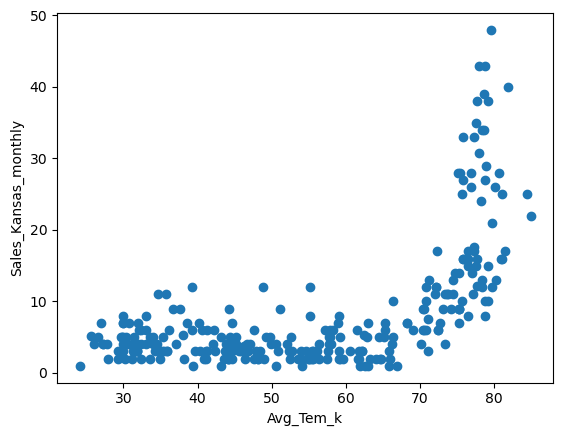

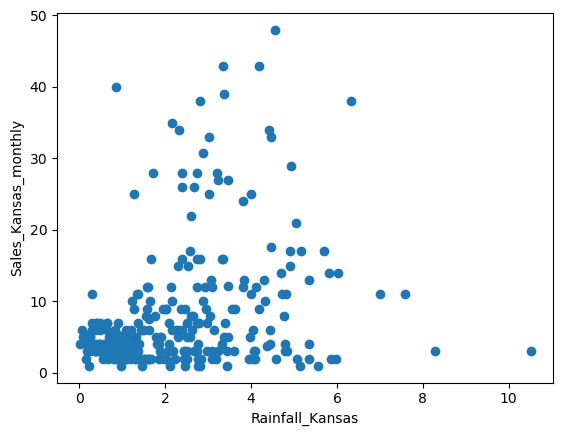

In [188]:
#Visualization
plt.scatter(df["Avg_Tem_k"], df["Sales_Kansas_monthly"])
plt.xlabel("Avg_Tem_k")
plt.ylabel("Sales_Kansas_monthly")
plt.show()

plt.scatter(df["Rainfall_Kansas"], df["Sales_Kansas_monthly"])
plt.xlabel("Rainfall_Kansas")
plt.ylabel("Sales_Kansas_monthly")
plt.show()

From the visualization the correlation between Avg_Tem_k and Sales_Kansas_monthly looks more suited to a regression analysis. This is expected considering it had a higher correlation from the correlation matrix.

We start our regression model by testing different degrees of the model.

In [191]:
#Regression on Sales Monthly 
lr1 = sm.ols(formula="Sales_Kansas_monthly ~ Avg_Tem_k", data=df).fit()
print(lr1.summary())

lr2 = sm.ols(formula = "Sales_Kansas_monthly ~ Avg_Tem_k + I(Avg_Tem_k ** 2.0)", data =df).fit()
print(lr2.summary())

lr3 = sm.ols(formula = "Sales_Kansas_monthly ~ Avg_Tem_k + I(Avg_Tem_k ** 2.0) + I(Avg_Tem_k ** 3.0)", data =df).fit()
print(lr3.summary())

lr4 = sm.ols(formula = "Sales_Kansas_monthly ~ Avg_Tem_k + I(Avg_Tem_k ** 2.0) + I(Avg_Tem_k ** 3.0) + I(Avg_Tem_k ** 4.0)", data =df).fit()
print(lr4.summary())

                             OLS Regression Results                             
Dep. Variable:     Sales_Kansas_monthly   R-squared:                       0.360
Model:                              OLS   Adj. R-squared:                  0.358
Method:                   Least Squares   F-statistic:                     152.1
Date:                  Thu, 17 Apr 2025   Prob (F-statistic):           5.07e-28
Time:                          16:44:14   Log-Likelihood:                -921.07
No. Observations:                   272   AIC:                             1846.
Df Residuals:                       270   BIC:                             1853.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7744      1.460

From these models we see that a model of degree three has one of the best R-squared and the p-values are all small. Thus we can make the conclusion that the degree three regression model is the best that we were able to build.

Next we test building a regression model using a neural network. First we test different solvers.

In [236]:
#MLPRegressor set up
X = df["Avg_Tem_k"].to_numpy().reshape(-1,1)
y = df["Sales_Kansas_monthly"].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Scale data
scaler = StandardScaler()
scaler.fit(X_train)

#Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
#First Neural Network regressor with solver = lbfgs
mlp_reg = MLPRegressor(hidden_layer_sizes=(8,8),verbose=0,random_state=5,solver='lbfgs', max_iter = 400)

mlp_reg.fit(X_train, y_train)

print("R-squared: ",mlp_reg.score(X_test,y_test)) # score = 1 is good

C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared:  0.6985004524988325


In [256]:
#Second Neural Network regressor with solver = sgd
mlp_reg = MLPRegressor(hidden_layer_sizes=(8,8),verbose=0,random_state=5,solver='sgd', max_iter=400)

mlp_reg.fit(X_train, y_train)

print("R-squared: ",mlp_reg.score(X_test,y_test)) # score = 1 is good

R-squared:  0.6922381516910241


C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [258]:
#Third Neural Network regressor with solver = adam
mlp_reg = MLPRegressor(hidden_layer_sizes=(8,8),verbose=0,random_state=5,solver='adam', max_iter = 400)

mlp_reg.fit(X_train, y_train)

print("R-squared:" ,mlp_reg.score(X_test,y_test)) # score = 1 is good

C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared: 0.4497402933561824


C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


These tests show that the sdg and lbfgs have very close scores. Moving forward we will test the other paramaters on the sgd solver.

In [323]:
mlp_relu = MLPRegressor(hidden_layer_sizes=(8,8),activation = 'relu' ,verbose=0,random_state=5,solver='lbfgs', max_iter = 400)
mlp_tanh = MLPRegressor(hidden_layer_sizes=(8,8),activation = 'tanh' ,verbose=0,random_state=5,solver='lbfgs',max_iter = 400)
mlp_logistic = MLPRegressor(hidden_layer_sizes=(8,8),activation = 'logistic' ,verbose=0,random_state=5,solver='lbfgs',max_iter = 400)

mlp_relu.fit(X_train, y_train)
mlp_tanh.fit(X_train, y_train)
mlp_logistic.fit(X_train, y_train)

print("Relu R-squared:" ,mlp_relu.score(X_test,y_test))# score = 1 is good
print("Tanh R-squared:" ,mlp_tanh.score(X_test,y_test))
print("Logistic R-squared:" ,mlp_logistic.score(X_test,y_test))

C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nicla

Relu R-squared: 0.6985004524988325
Tanh R-squared: 0.6223482486866413
Logistic R-squared: 0.5811895627214354


C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


From these test we see that using relu as the activation function builds the best model.

## Write up

**Explanation of Exploartory analysis** 
We began the exploratory analysis by viewing the correlation matrix to see which features of our data frame had a correlation. From this we saw that Sales_Kansas_monthly had a correlation with Avg_Tem_k. From there we began by constructing multiple ols models to see what degree gave the best model. We found that a degree three model gave the highest R-squared value, 0.630, and had low p-values. When we tested a fourth degree model the p-models got very large so it is where we chose to stop.

After these initial models we chose to use a neural network to create regression models. We made a train_test split with 20% of the data going to the test data. We first tested three solvers and found that the 'sgd' and 'lbfgs' solvers had similar R-squared values but the 'lbfgs' was slightly better so we continued testing this.

We changed the  activation funtion and found that using 'relu' gave the highest R-squared score of 0.692 and was thus the best regression model that was built. 

One thing of note for the neural network is the sensitivity of the model to the train-test split. While building the models if the train-test split was changed the R-squared score had drastic changes ranging from 0.4 and 0.7 depending on the train-test split.

In [17]:
#Import/Export regressions
#MLPRegressor set up
X = df["Export_usa_monthly"].to_numpy().reshape(-1,1)
y = df["Price_Kansas_monthly"].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Scale data
scaler = StandardScaler()
scaler.fit(X_train)

#Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Import_mlp = MLPRegressor(hidden_layer_sizes=(8,8),activation = 'relu' ,verbose=0,random_state=5,solver='lbfgs', max_iter = 400)

Import_mlp.fit(X_train, y_train)

print("Import R-squared: ", Import_mlp.score(X_test, y_test))

Export_mlp = MLPRegressor(hidden_layer_sizes=(8,8),activation = 'relu' ,verbose=0,random_state=5,solver='lbfgs', max_iter = 400)

Export_mlp.fit(X_train, y_train)

print("Export R-squared: ", Export_mlp.score(X_test, y_test))


Import R-squared:  0.6025596666938917
Export R-squared:  0.6025596666938917


C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
